 **ML PROJECT** : ***E-commerce Customer satisfaction Classification***

NAME    : **AMAN BISHT** 

In [19]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
# Load the dataset
df = pd.read_csv("ecommerce.csv")
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [3]:
#3 Exploratory Data Analysis

# Check missing values
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [4]:
# Summary statistics for numerical columns
df.describe()


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [5]:
# Categorical columns: Gender, City, Membership Type, Discount Applied, Satisfaction Level
categorical_cols = ['Gender', 'City', 'Membership Type', 'Discount Applied', 'Satisfaction Level']

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Gender:
Gender
Female    175
Male      175
Name: count, dtype: int64

Value counts for City:
City
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64

Value counts for Membership Type:
Membership Type
Gold      117
Silver    117
Bronze    116
Name: count, dtype: int64

Value counts for Discount Applied:
Discount Applied
True     175
False    175
Name: count, dtype: int64

Value counts for Satisfaction Level:
Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64


In [6]:
#4 Pre-processsing
# Drop rows with null values
df.dropna(inplace = True)

# Drop Customer ID (as there is no relation between customer id and satisfaction level)
df = df.drop('Customer ID', axis=1)

In [7]:
# Encode categorical columns
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Membership Type'] = df['Membership Type'].map({'Bronze': 0, 'Silver': 1, 'Gold': 2})
df['City'] = df['City'].astype('category').cat.codes
df['Discount Applied'] = df['Discount Applied'].astype(int)
df['Satisfaction Level'] = df['Satisfaction Level'].map({'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2})

In [8]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,1,29,4,2,1120.20,14,4.6,1,25,2
1,0,34,2,1,780.50,11,4.1,0,18,1
2,1,43,0,0,510.75,9,3.4,1,42,0
3,0,30,5,2,1480.30,19,4.7,0,12,2
4,0,27,3,1,720.40,13,4.0,1,55,0


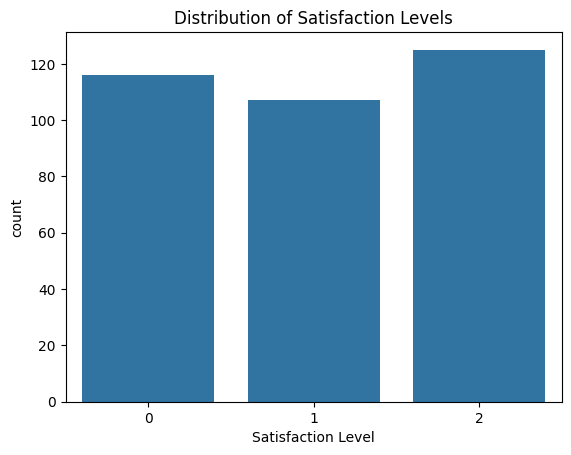

In [9]:
# Plot satisfaction distribution
sns.countplot(x='Satisfaction Level', data=df)
plt.title("Distribution of Satisfaction Levels")
plt.show()



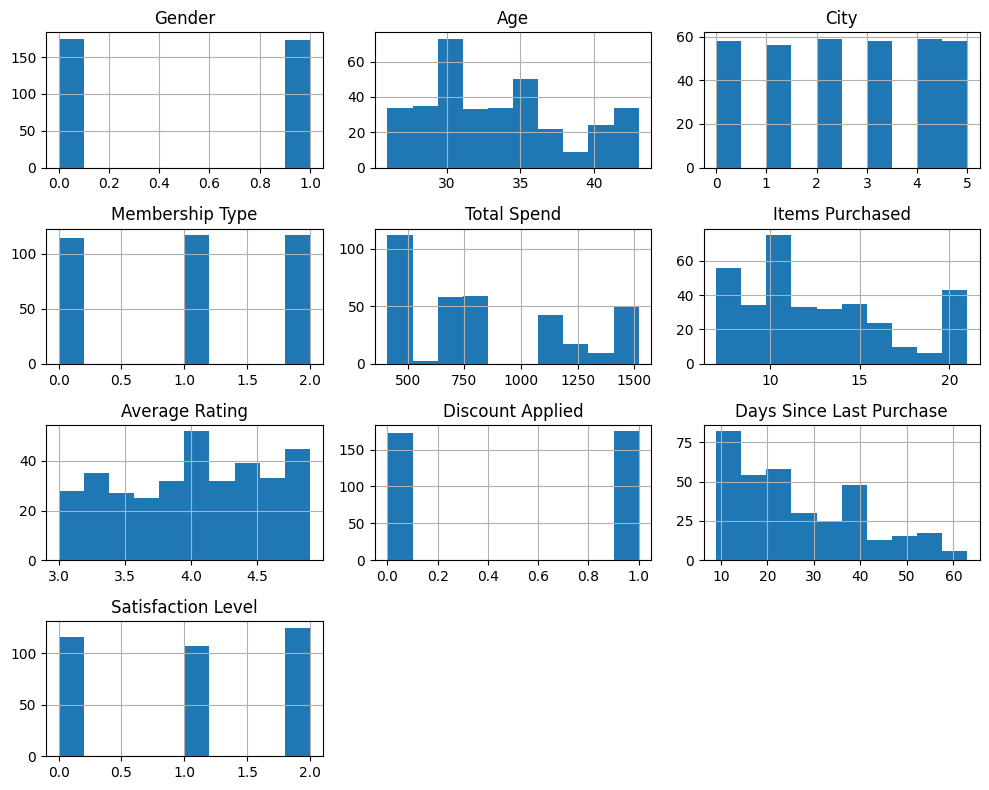

In [10]:
# Numerical features distribution
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


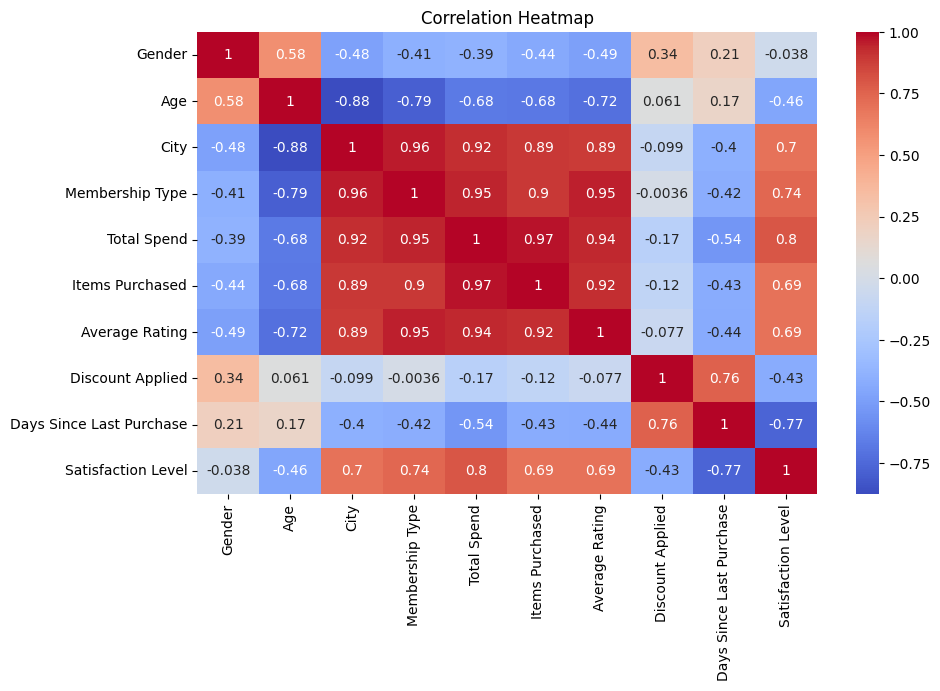

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Features and target
X = df.drop('Satisfaction Level', axis=1)
y = df['Satisfaction Level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
#5. Classification using k-fold cross-validation
def evaluate_model(model, X, y, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    accuracies, precisions, recalls, f1s = [], [], [], []
    total_cm = np.zeros((3, 3), dtype=int)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        f1s.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
        total_cm += confusion_matrix(y_test, y_pred)

    return {
        'Accuracy': np.mean(accuracies),
        'Precision': np.mean(precisions),
        'Recall': np.mean(recalls),
        'F1-score': np.mean(f1s),
        'Confusion Matrix': total_cm
    }

# --- Classifier
def logistic_regression(X, y): return evaluate_model(LogisticRegression(max_iter=2000), X, y)
def svm_classifier(X, y): return evaluate_model(SVC(), X, y)
def decision_tree(X, y): return evaluate_model(DecisionTreeClassifier(), X, y)
def knn_classifier(X, y): return evaluate_model(KNeighborsClassifier(), X, y)
def gaussian_nb(X, y): return evaluate_model(GaussianNB(), X, y)
results = {
    'Logistic Regression': logistic_regression(X_scaled, y),
    'SVM': svm_classifier(X_scaled, y),
    'Decision Tree': decision_tree(X_scaled, y),
    'KNN': knn_classifier(X_scaled, y),
    'Gaussian NB': gaussian_nb(X_scaled, y)
}

In [18]:
# Display Metrics
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Average Accuracy    : {metrics['Accuracy']:.4f}")
    print(f"Average Precision   : {metrics['Precision']:.4f}")
    print(f"Average Recall      : {metrics['Recall']:.4f}")
    print(f"Average F1-score    : {metrics['F1-score']:.4f}")
    print(f"\nSum Total Confusion Matrix:\n{metrics['Confusion Matrix']}")


Model: Logistic Regression
Average Accuracy    : 0.9741
Average Precision   : 0.9748
Average Recall      : 0.9755
Average F1-score    : 0.9742

Sum Total Confusion Matrix:
[[116   0   0]
 [  0 106   1]
 [  0   8 117]]

Model: SVM
Average Accuracy    : 0.9770
Average Precision   : 0.9776
Average Recall      : 0.9787
Average F1-score    : 0.9771

Sum Total Confusion Matrix:
[[116   0   0]
 [  0 107   0]
 [  0   8 117]]

Model: Decision Tree
Average Accuracy    : 0.9913
Average Precision   : 0.9916
Average Recall      : 0.9916
Average F1-score    : 0.9913

Sum Total Confusion Matrix:
[[116   0   0]
 [  0 106   1]
 [  0   2 123]]

Model: KNN
Average Accuracy    : 0.9971
Average Precision   : 0.9974
Average Recall      : 0.9968
Average F1-score    : 0.9971

Sum Total Confusion Matrix:
[[116   0   0]
 [  0 106   1]
 [  0   0 125]]

Model: Gaussian NB
Average Accuracy    : 0.9770
Average Precision   : 0.9776
Average Recall      : 0.9787
Average F1-score    : 0.9771

Sum Total Confusion Matri